# ISLR Chapter 4 Applied Exercises
## Excercise №13, p. 194
This question should be answered using the `Weekly` data set, which is part of the ISLP package. This data is similar in nature to the `Smarket` data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.  
(a) Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?  
(b) Use the full data set to perform a _logistic regression_ with `Direction` as the response and the _five lag variables_ plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?  
(c) Compute the _confusion matrix_ and overall _fraction of correct predictions_. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.  
(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).  
(e) Repeat (d) using LDA.  
(f) Repeat (d) using QDA.  
(g) Repeat (d) using KNN with K = 1.  
(h) Repeat (d) using naive Bayes.  
(i) Which of these methods appears to provide the best results on this data?  
(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Loading the data set
Load `Weekly` data set from the ISLP package.

In [3]:
df = load_data('Weekly')
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


## Data summaries
Numerical and graphical summaries of the data set.
### Correlation

In [4]:
df.corr(numeric_only=True)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


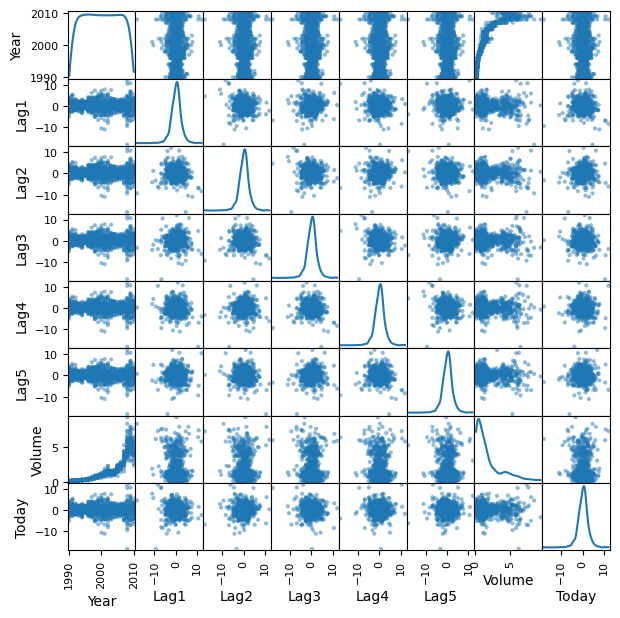

In [70]:
# visualize all of the pairwise relationships between the columns in a data frame.
scatterplot = pd.plotting.scatter_matrix(df, figsize=(7, 7), diagonal='kde', alpha=0.5)

1) The `Volume` increases year over year. The correlation between `Year` and `Volume` is 0.84
2) All other predictors seem to be uncorrelated  

### Let's plot the `Volume` over time

<Axes: >

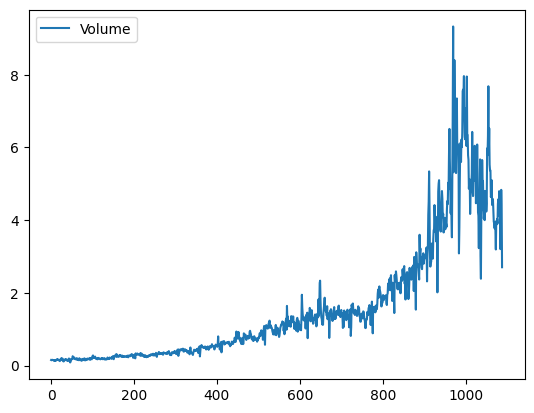

In [10]:
df.plot(y='Volume')

### Performing logistic regression with all numerical predictors
Use the full data set to perform a logistic regression with `Direction` as the response and the five `lag` variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [32]:
pred = df.columns.drop(['Today', 'Direction', 'Year'])
X = MS(pred).fit_transform(df)
y = df.Direction == 'Up'
glm = sm.Logit(y, X)
results = glm.fit()
summarize(results)

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


The smallest `p-value` is associated with `Lag2` and it is the only significant predictor. The positive coefficient for this predictor suggests that if the market had a negative return the day before yesterday, then it is less likely to go up today. 

In [18]:
probs = results.predict() # array with probabilities
labels = np.array(['Down']*df.shape[0]) # array filled with 'Down' times number or rows in the dataframe 
labels[probs>0.5] = 'Up' # change value to 'Up' if probability is greater than 0.5
confusion_table(labels, df.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [20]:
np.mean(labels == df.Direction) # fraction of days for which the prediction was correct

0.5610651974288338

56% correct predictions  
100% - 56% = 44% is the training error rate. This is not very promising because training error tends to be lower than test error rate.

### Performing logistic regression with 'Lag2'
Let's perform the logistic regression with the `Lag2`, since it was the only one with significant `p-value`.
But first, we'll split training and test sets based on year.
#### Splitting train and test sets

In [36]:
train = (df.Year < 2009) # 1990 to 2008
df_train = df.loc[train]
df_test = df.loc[~train] # 2009+
df_test.shape

(104, 9)

We have 104 observations in the `test` data set

In [47]:
X = MS(['Lag2']).fit_transform(df)
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm = sm.Logit(y_train, X_train)
results = glm.fit()
summarize(results)
probs = results.predict(exog=X_test)
D = df.Direction
L_train, L_test = D.loc[train], D.loc[~train] # getting true labels from Direction column
labels = np.array(['Down']*L_test.shape[0])
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [51]:
np.mean(labels == L_test)

0.625

62.5% correct predictions
100% - 62.5% = 37.5% is the training error rate. This is an improvement compared to first iteration.

## Predicting using Linear Discriminant Analysis (LDA)

In [55]:
lda = LDA(store_covariance=True)
lda.fit(X_train, L_train)
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


The results are identical to linear regression

## Predicting using Quadratic Discriminant Analysis (QDA)

In [57]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [58]:
np.mean(qda_pred == L_test)

0.5865384615384616

In [59]:
L_test

985     Down
986     Down
987     Down
988     Down
989       Up
        ... 
1084      Up
1085      Up
1086      Up
1087      Up
1088      Up
Name: Direction, Length: 104, dtype: category
Categories (2, object): ['Down', 'Up']

## Naive Bayes

In [63]:
nbayes =  GaussianNB()
nbayes.fit(X_train, L_train)
nbayes.class_prior_

array([0.44771574, 0.55228426])

In [64]:
X_train[L_train == 'Down'].mean()

Lag2   -0.035683
dtype: float64

In [65]:
X_train[L_train == 'Down'].var(ddof=0)

Lag2    4.826847
dtype: float64

In [67]:
nbayes_labels = nbayes.predict(X_test)
confusion_table(nbayes_labels, L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


## K-Nearest Neighbors

In [71]:
knn1 = KNeighborsClassifier(n_neighbors=1)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,21,30
Up,22,31


In [72]:
np.mean(knn1_pred == L_test)

0.5

The results using `K = 1` are not very good. It may be that results in an overly-flexible fit to the data.  
Let's repeat with `K = 3`

In [73]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, L_train).predict(X_test)
np.mean(knn3_pred == L_test)

0.5576923076923077

The results have improved slightly. But increasing K further provides no further improvements. It appears that for these data, and this train/test split, QDA gives the best results of the methods that we have examined so far.